# Debuggin Systems

In [1]:
%matplotlib notebook

In [2]:
# imports
import os 
import datetime
import numpy as np
from pkg_resources import resource_filename
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



import pandas
import iris
import iris.quickplot as qplt

from oceanpy.sst import io as sst_io
from mhw_analysis.systems import io as mhw_sys_io

# Load

In [28]:
mhw_path = '/home/xavier/Projects/Oceanography/MHW/db'

In [29]:
mhw_sys = pandas.read_hdf(os.path.join(mhw_path,  'MHW_systems.hdf'))

# Check a major Pacific event

In [30]:
pacific = mhw_sys[mhw_sys.NSpax == 21865216]
pacific

NSpax  category  mask_Id  max_area        xcen  xboxmin  xboxmax  \
Id                                                                        
41  21865216         4       51     49981  340.881714       46      685   

          ycen  yboxmin  yboxmax         zcen  zboxmin  zboxmax        date  \
Id                                                                            
41  785.716858      541     1386  6077.689941     4979     6380  1998-08-22   

         lat         lon  
Id                        
41 -4.654572  196.554214

In [31]:
pacific_sys = mhw_sys.loc[41]
pacific_sys

NSpax         21865216
category             4
mask_Id             51
max_area         49981
xcen           340.882
xboxmin             46
xboxmax            685
ycen           785.717
yboxmin            541
yboxmax           1386
zcen           6077.69
zboxmin           4979
zboxmax           6380
date        1998-08-22
lat           -4.65457
lon            196.554
Name: 41, dtype: object

In [32]:
pacific_sys.date.day

22

## Pull NOAA

In [33]:
# Load SSTa
SSTa = sst_io.load_noaa((pacific_sys.date.day, pacific_sys.date.month, pacific_sys.date.year), subtract_seasonal=True)
# Cut on Region
latlon_constraint = iris.Constraint(
    latitude=lambda cell: -50 <= cell < 50.,
    longitude=lambda cell: 180. < cell < 270.)
pacific_slice = SSTa.extract(latlon_constraint)

## Plot

<IPython.core.display.Javascript object>


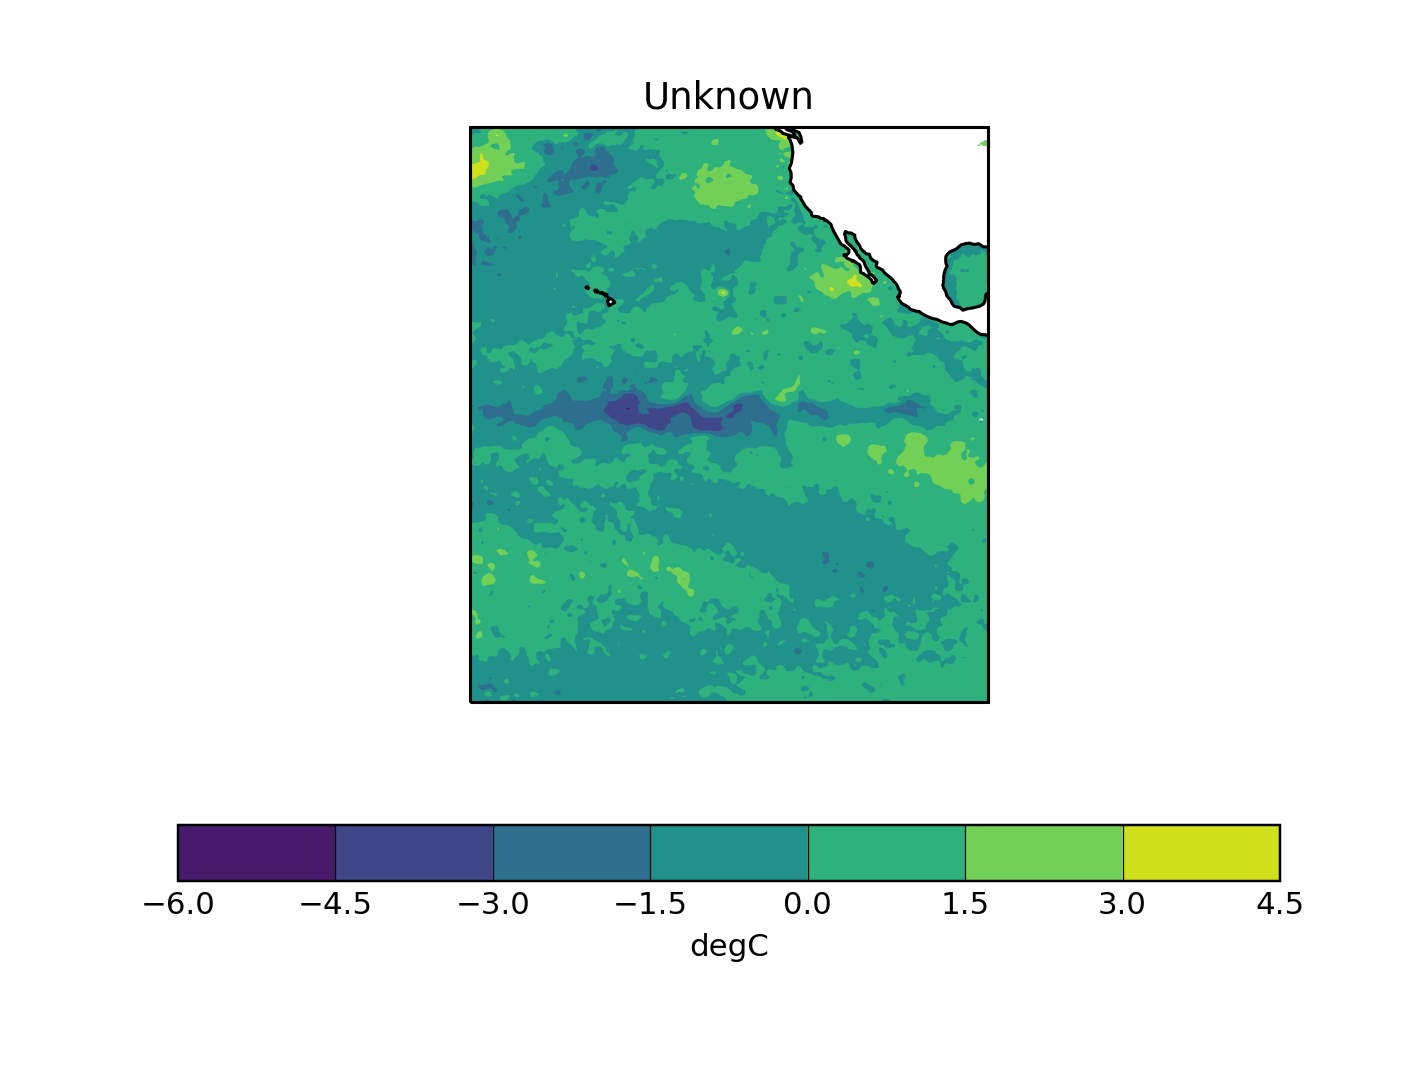

In [20]:
plt.clf()
# Draw the contour with 25 levels.
qplt.contourf(pacific_slice)#, vmin=-3., vmax=3.)#, 25)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()

plt.show()

----

# Load tst

In [23]:
tst_sys = pandas.read_hdf(os.path.join(resource_filename('mhw_analysis', 'systems'),  'tst.hdf'))

In [4]:
tst_sys.head()

NSpax  category  mask_Id  max_area       xcen  xboxmin  xboxmax  \
Id                                                                     
1   166788         1        1      2653  62.341091       46       93   
2       19         1        4         6  46.657894       46       48   
3      305         4        7        10  45.690163       46       47   
4       51         1        8         5  45.500000       46       46   
5       75         2        9         8  45.633335       46       47   

          ycen  yboxmin  yboxmax        zcen  zboxmin  zboxmax        date  \
Id                                                                           
1   718.667786      650      863  135.980988        1      359  2014-02-17   
2   662.131592      661      663  375.605255      371      378  2014-10-15   
3   674.759033      672      678  290.591797      271      316  2014-07-22   
4   675.029419      673      677  220.833328      211      228  2014-05-13   
5   674.886658      673      678  241.246674      235      249  2014-06-03   

          lat         lon  
Id                         
1  -74.289727  179.791946  
2  -78.210526  165.657898  
3  -78.452459  168.814758  
4  -78.500000  168.882355  
5  -78.466666  168.846664

# Pacific

In [18]:
sys_near_blob = (tst_sys.date > datetime.date(2013,10,1)) & (tst_sys.date < datetime.date(2016,1,1)) & (
                  tst_sys.lat > 0.) & (tst_sys.lat < 60.) & (tst_sys.lon > 160.) & (tst_sys.lon < 250)

In [19]:
near_blob = tst_sys[sys_near_blob]
near_blob['duration'] = near_blob.zboxmax - near_blob.zboxmin+1
near_blob = near_blob.sort_values('duration',ascending=False)

/home/xavier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
near_blob[['NSpax', 'lat', 'lon', 'date', 'duration', 'max_area', 'zboxmin', 'zboxmax']]

NSpax        lat         lon        date  duration  max_area  \
Id                                                                       
631    23106130   2.189713  163.804138  2014-04-20       378     88222   
13239      1059  27.275024  237.918549  2014-04-01        69        57   
14205      1499  37.731987  231.869751  2014-01-16        58        76   
15560     15683  57.290527  220.878754  2013-10-27        56       568   
12588      2773  22.043907  177.233597  2013-11-13        55       137   
...         ...        ...         ...         ...       ...       ...   
11890        29  13.448273  177.948273  2013-10-05         1        29   
14561         1  39.000000  176.000000  2013-10-05         1         1   
13381         2  26.000000  218.375000  2013-10-05         1         2   
11812         9  12.222221  172.083328  2014-10-17         1         9   
13260         4  24.937500  185.937500  2013-10-05         1         4   

       zboxmin  zboxmax  
Id                       
631          1      378  
13239      144      212  
14205       71      128  
15560        1       56  
12588       20       74  
...        ...      ...  
11890        1        1  
14561        1        1  
13381        1        1  
11812      378      378  
13260        1        1  

[1870 rows x 8 columns]

----

# Plot cube

In [22]:
tst_cube = np.load(os.path.join(resource_filename('mhw_analysis', 'systems'),  'tst_cube.npz'))['arr_0'].astype(np.int8)

In [24]:
tst_cube.shape

(720, 1440, 380)

In [34]:
SSTa

<iris 'Cube' of unknown / (degC) (latitude: 720; longitude: 1440)>

In [51]:
tst1_cube = tst_cube.copy()
tst1_cube[tst1_cube>0] = 1

lat_coord = SSTa.coord('latitude')
lon_coord = SSTa.coord('longitude')


2014-04-03


<IPython.core.display.Javascript object>


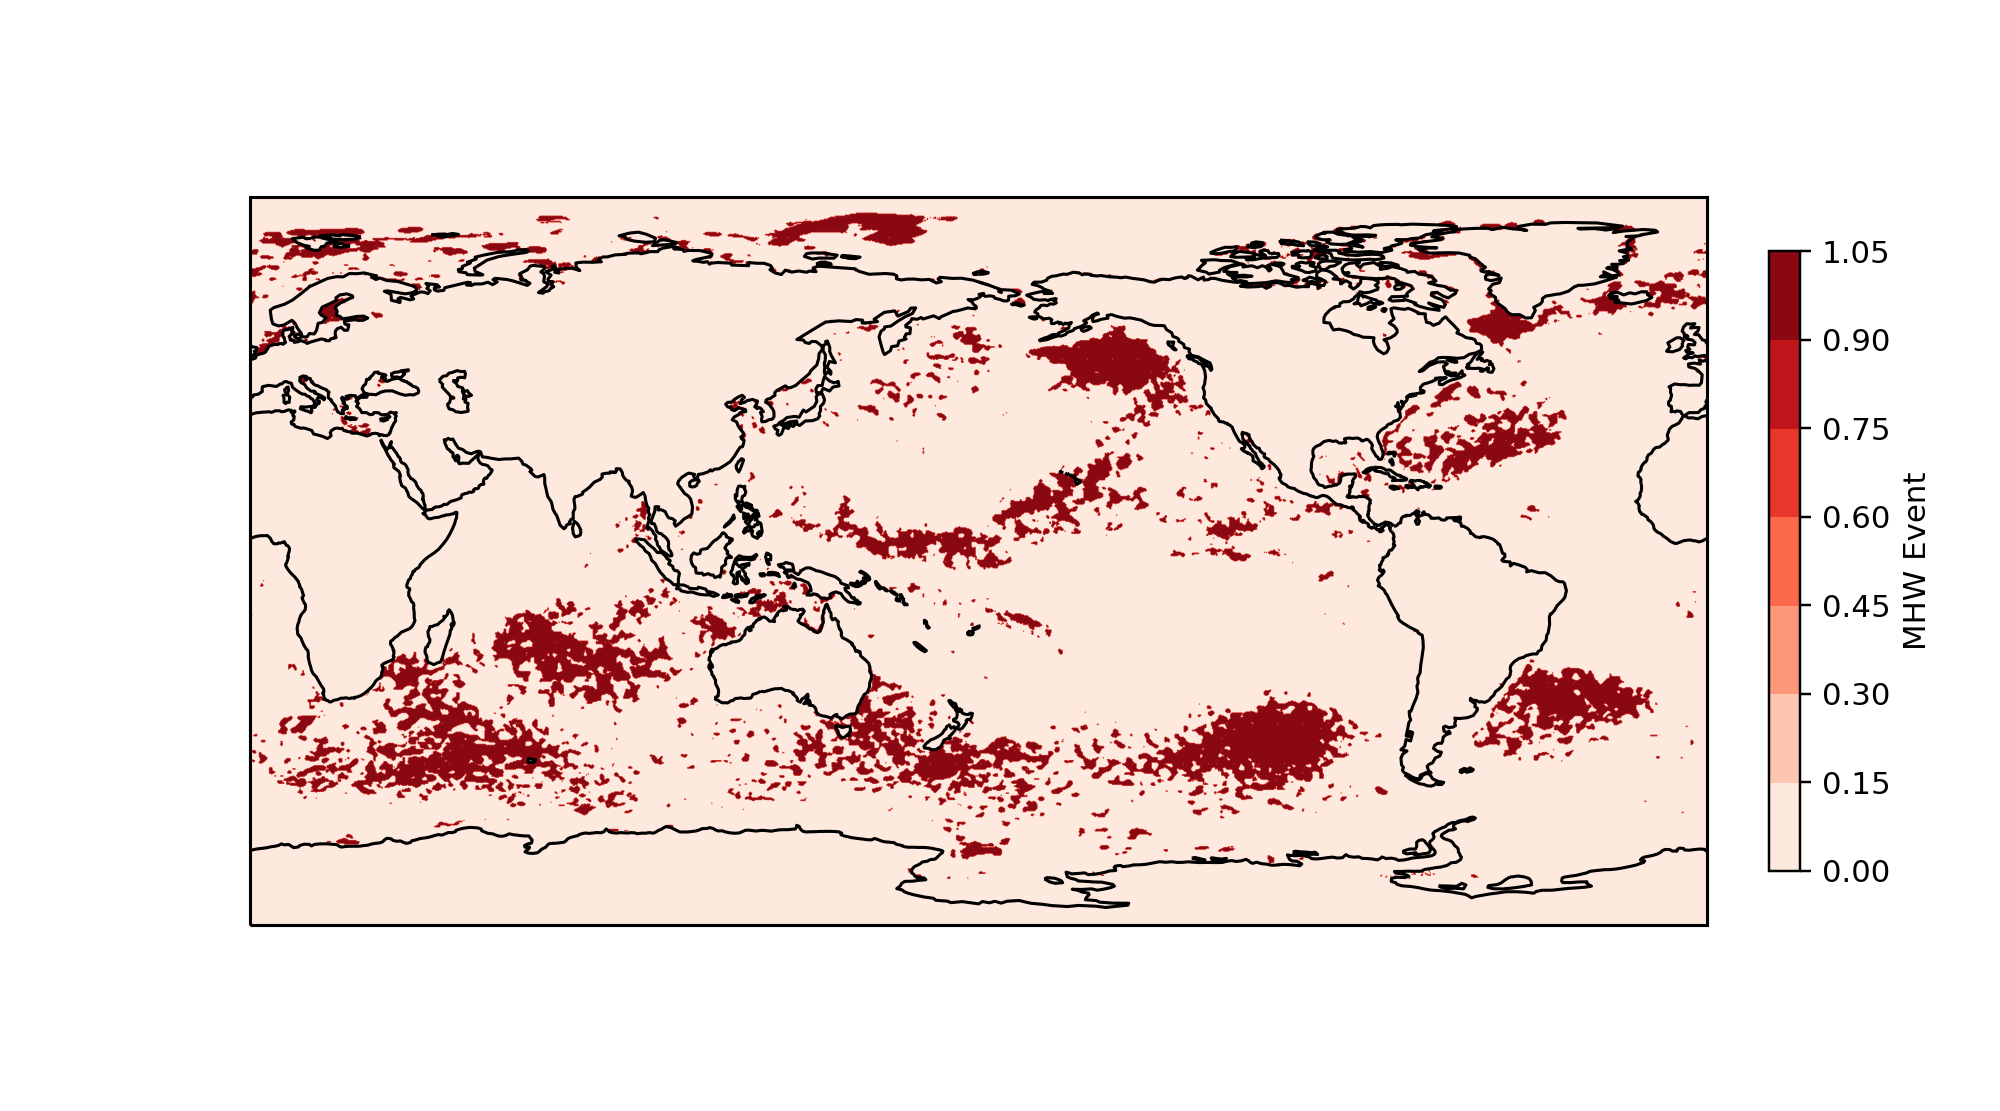

In [133]:
#ii=40
ii=180
#ii += 5
dd = datetime.date.fromordinal(datetime.date(2013, 10, 5).toordinal() + ii)
print(dd)
ev_cube = iris.cube.Cube(tst1_cube[:,:,ii], var_name='Events',
                      dim_coords_and_dims=[(lat_coord, 0),
                                           (lon_coord, 1)])

fig = plt.figure(figsize=(9, 5))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('Reds')

cplt = iris.plot.contourf(ev_cube, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('MHW Event')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

In [135]:
dd = datetime.date.fromordinal(datetime.date(2013, 10, 5).toordinal() + 200)
dd

datetime.date(2014, 4, 23)

# Mask

In [158]:
tst_mask = np.load(os.path.join(resource_filename('mhw_analysis', 'systems'),  'tst.npz'))['mask']

In [159]:
tst_mask.shape

(720, 1440, 380)

In [160]:
idx, counts = np.unique(tst_mask, return_counts=True)

In [161]:
blob_id = idx[1:][np.argmax(counts[1:])]
blob_id

42

## Blob

In [162]:
blob_idx = tst_mask == blob_id

In [163]:
#any_mask = np.sum(blob_idx, axis=2)

any_mask = np.sum(blob_idx[:,:,150:200], axis=2)
any_mask[any_mask > 0] = 1
any_mask.shape

(720, 1440)

## Plot

In [164]:
any_blob_cube = iris.cube.Cube(any_mask, var_name='Blob',
                      dim_coords_and_dims=[(lat_coord, 0),
                                           (lon_coord, 1)])

<IPython.core.display.Javascript object>


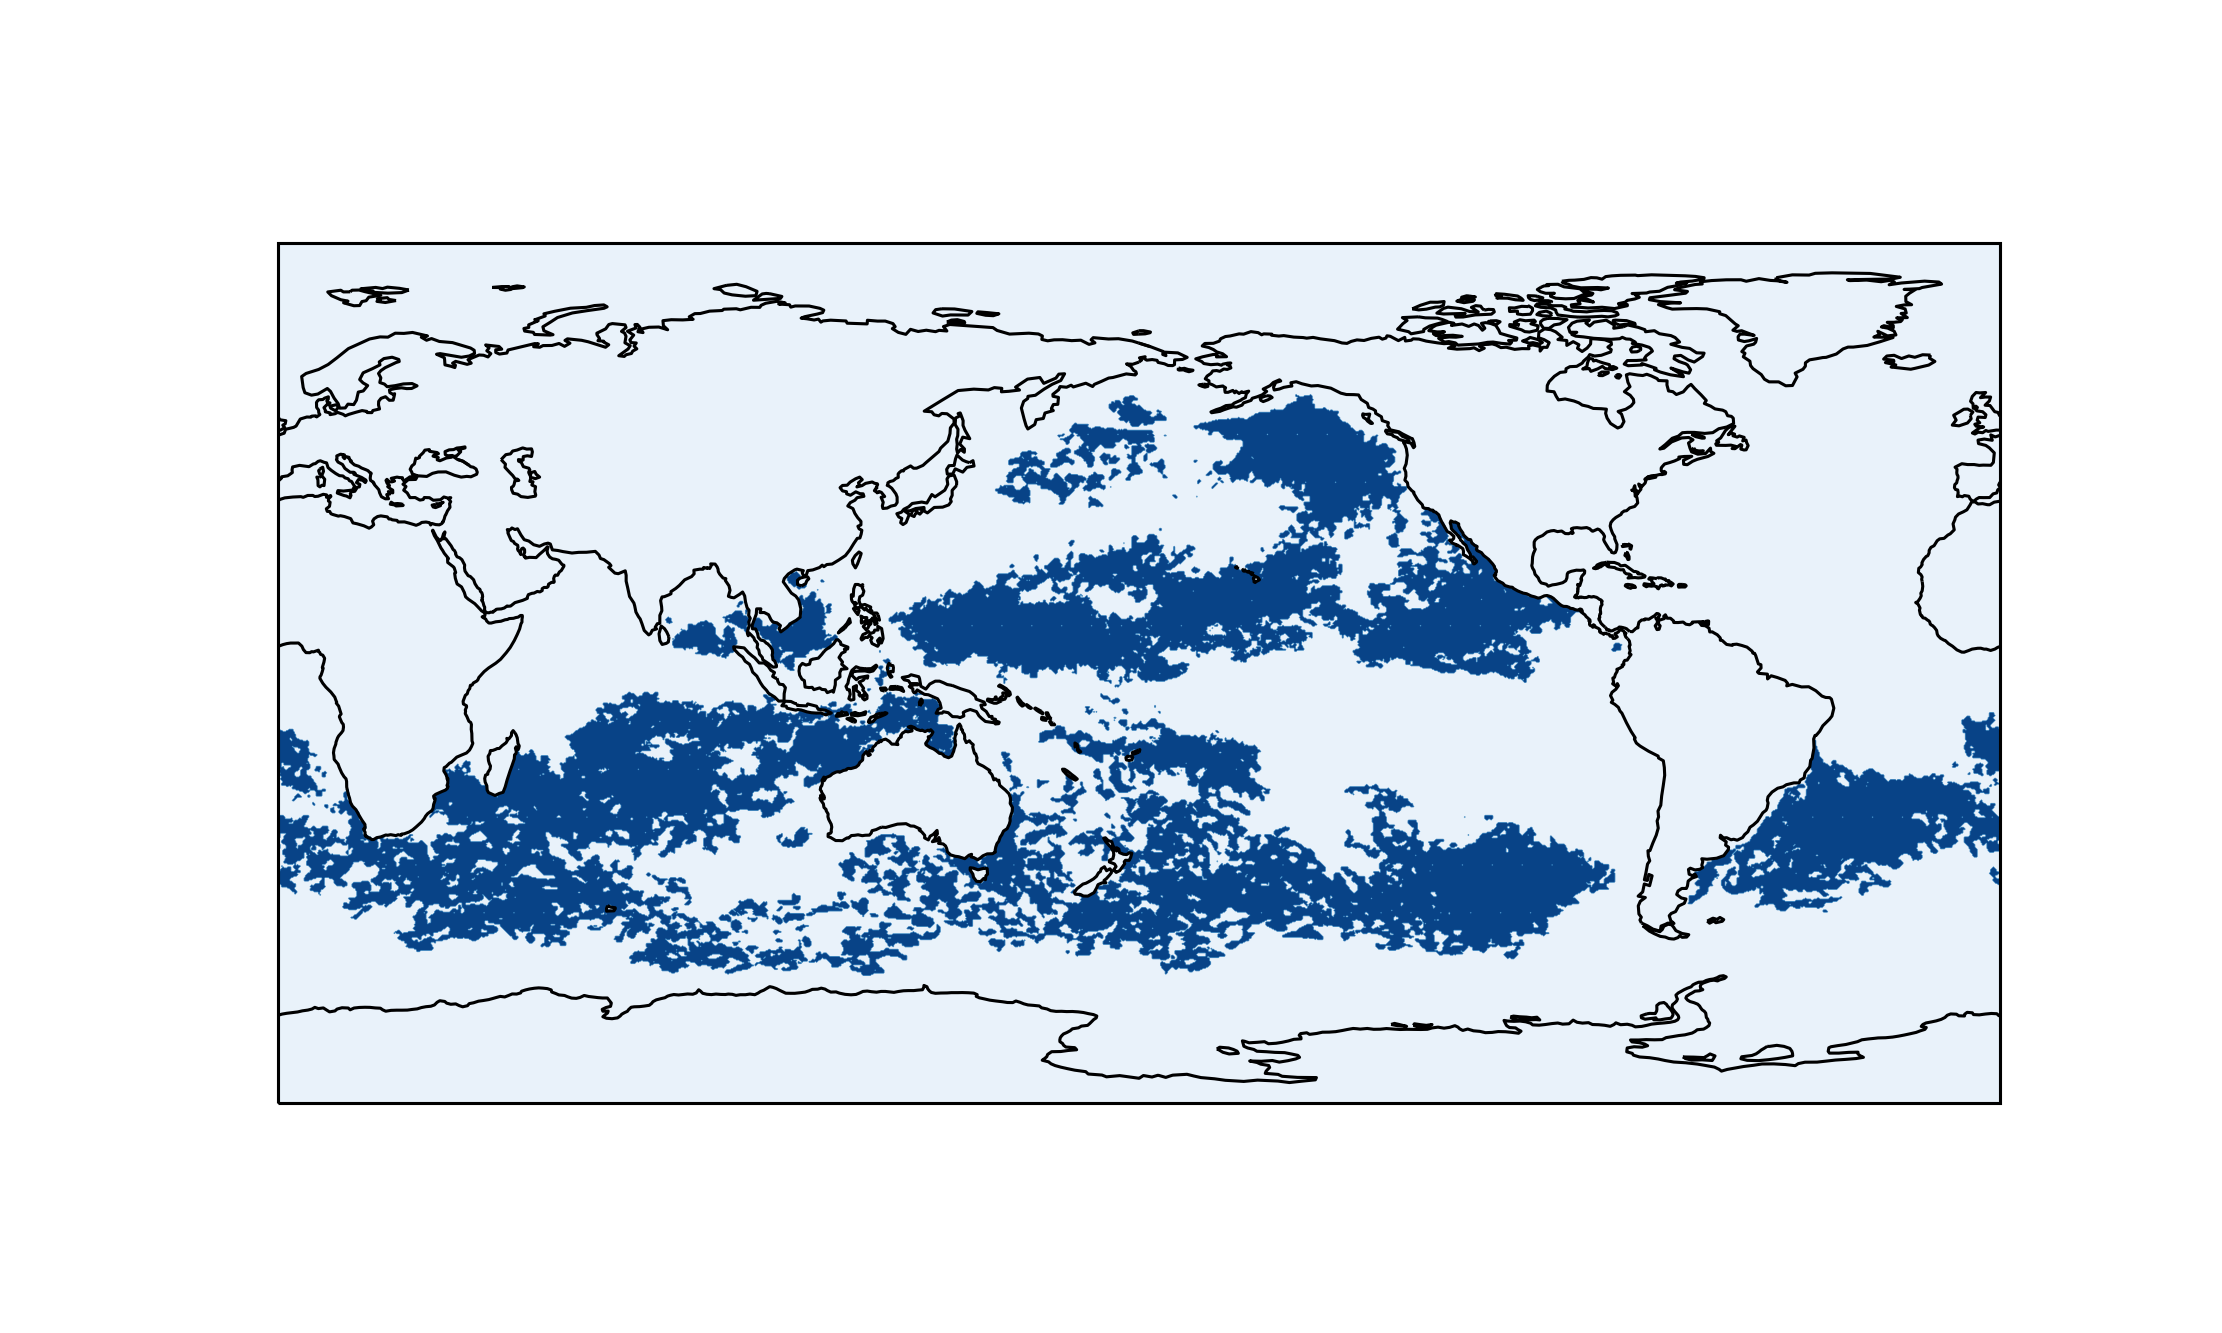

In [165]:
fig = plt.figure(figsize=(10, 6))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('Blues')

cplt = iris.plot.contourf(any_blob_cube, cmap=cm)  # , vmin=0, vmax=20)#, 5)
#cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
#cb.set_label('Blob')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.show()

## By date

In [166]:
date_mask = np.zeros_like(tst_mask)
date_mask[blob_idx] = 1
for kk in range(date_mask.shape[2]):
    date_mask[:,:,kk] *= kk+1

In [167]:
avg_date_mask = np.sum(date_mask, axis=2) / np.sum(date_mask>0, axis=2)
avg_date_mask[avg_date_mask == 0] = np.nan

/home/xavier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [168]:
date_blob_cube = iris.cube.Cube(avg_date_mask, var_name='Blob_date',
                      dim_coords_and_dims=[(lat_coord, 0),
                                           (lon_coord, 1)])

### First day

In [179]:
tstart = date_mask.copy()
tstart[tstart == 0] = 999999
#
tstart = np.min(tstart, axis=2).astype(float)
tstart[tstart == 999999] = np.nan
tstart.shape

(720, 1440)

In [180]:
tstart_blob_cube = iris.cube.Cube(tstart, var_name='Blob_tstart',
                      dim_coords_and_dims=[(lat_coord, 0),
                                           (lon_coord, 1)])

### Duration

In [189]:
duration = np.sum(blob_idx, axis=2).astype(float)
duration[duration == 0] = np.nan
duration.shape

(720, 1440)

In [190]:
np.max(duration[np.isfinite(duration)])

365.0

In [192]:
dur_blob_cube = iris.cube.Cube(duration, var_name='Blob_duration',
                      dim_coords_and_dims=[(lat_coord, 0),
                                           (lon_coord, 1)])

### Plots

<IPython.core.display.Javascript object>


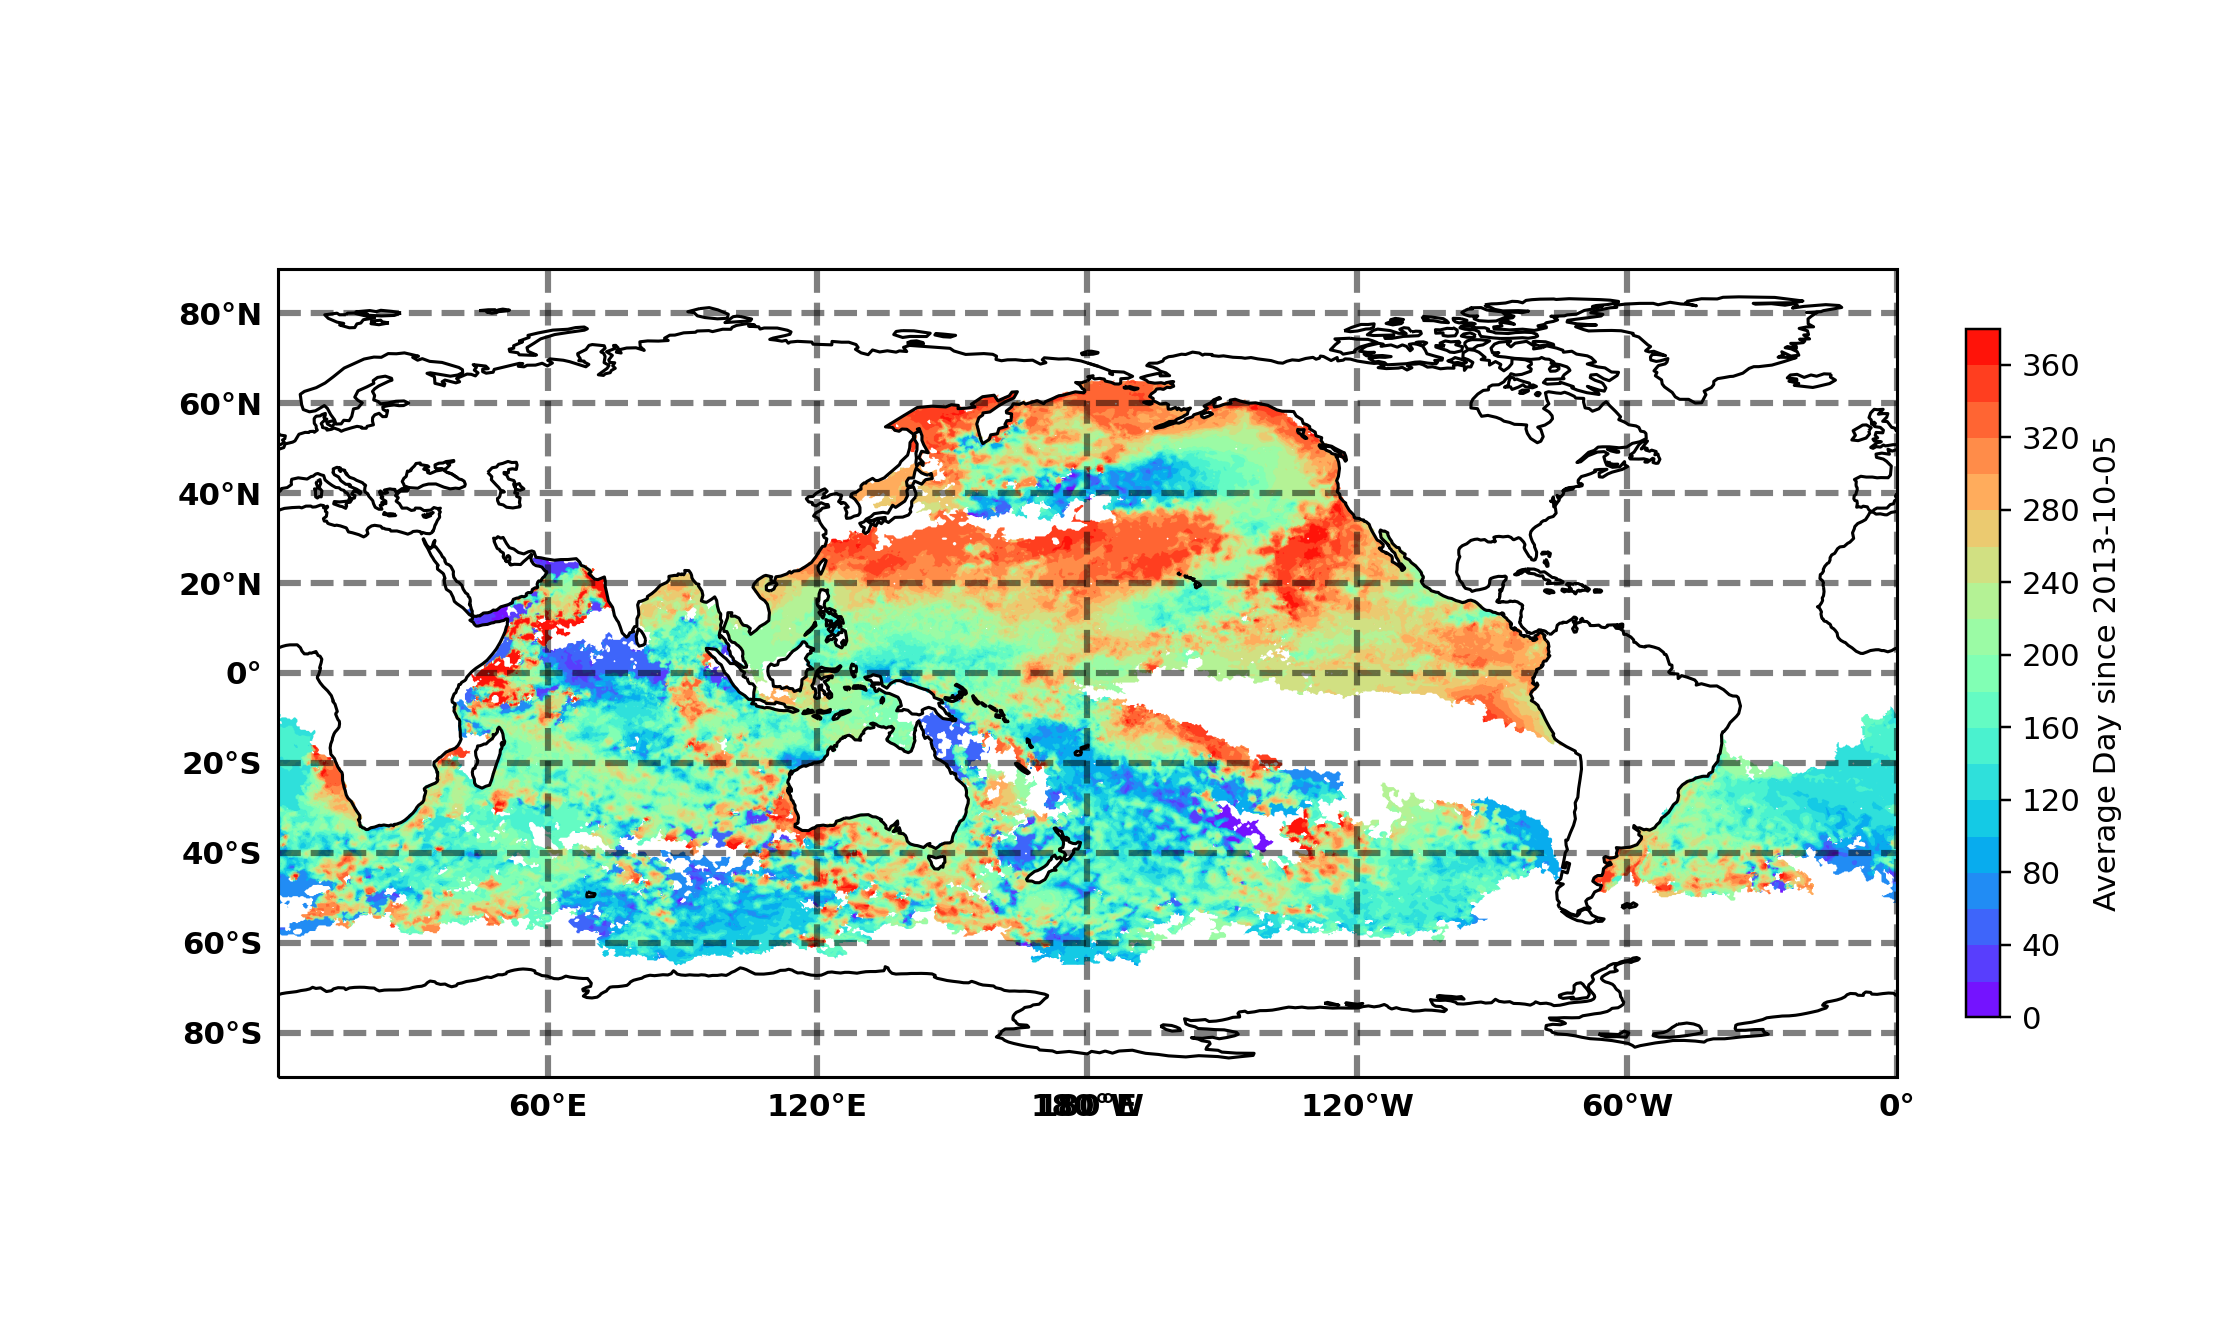

In [169]:
fig = plt.figure(figsize=(10, 6))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('rainbow')

cplt = iris.plot.contourf(date_blob_cube, 20, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('Average Day since 2013-10-05')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()


# Gridlines
# https://stackoverflow.com/questions/49956355/adding-gridlines-using-cartopy
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5,
                  linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}
#gl.xlocator = mticker.FixedLocator([-180., -170., -160, -150., -140, -120, -60, -20.])
#gl.ylocator = mticker.FixedLocator([30., 40., 50., 60.])


plt.show()

<IPython.core.display.Javascript object>


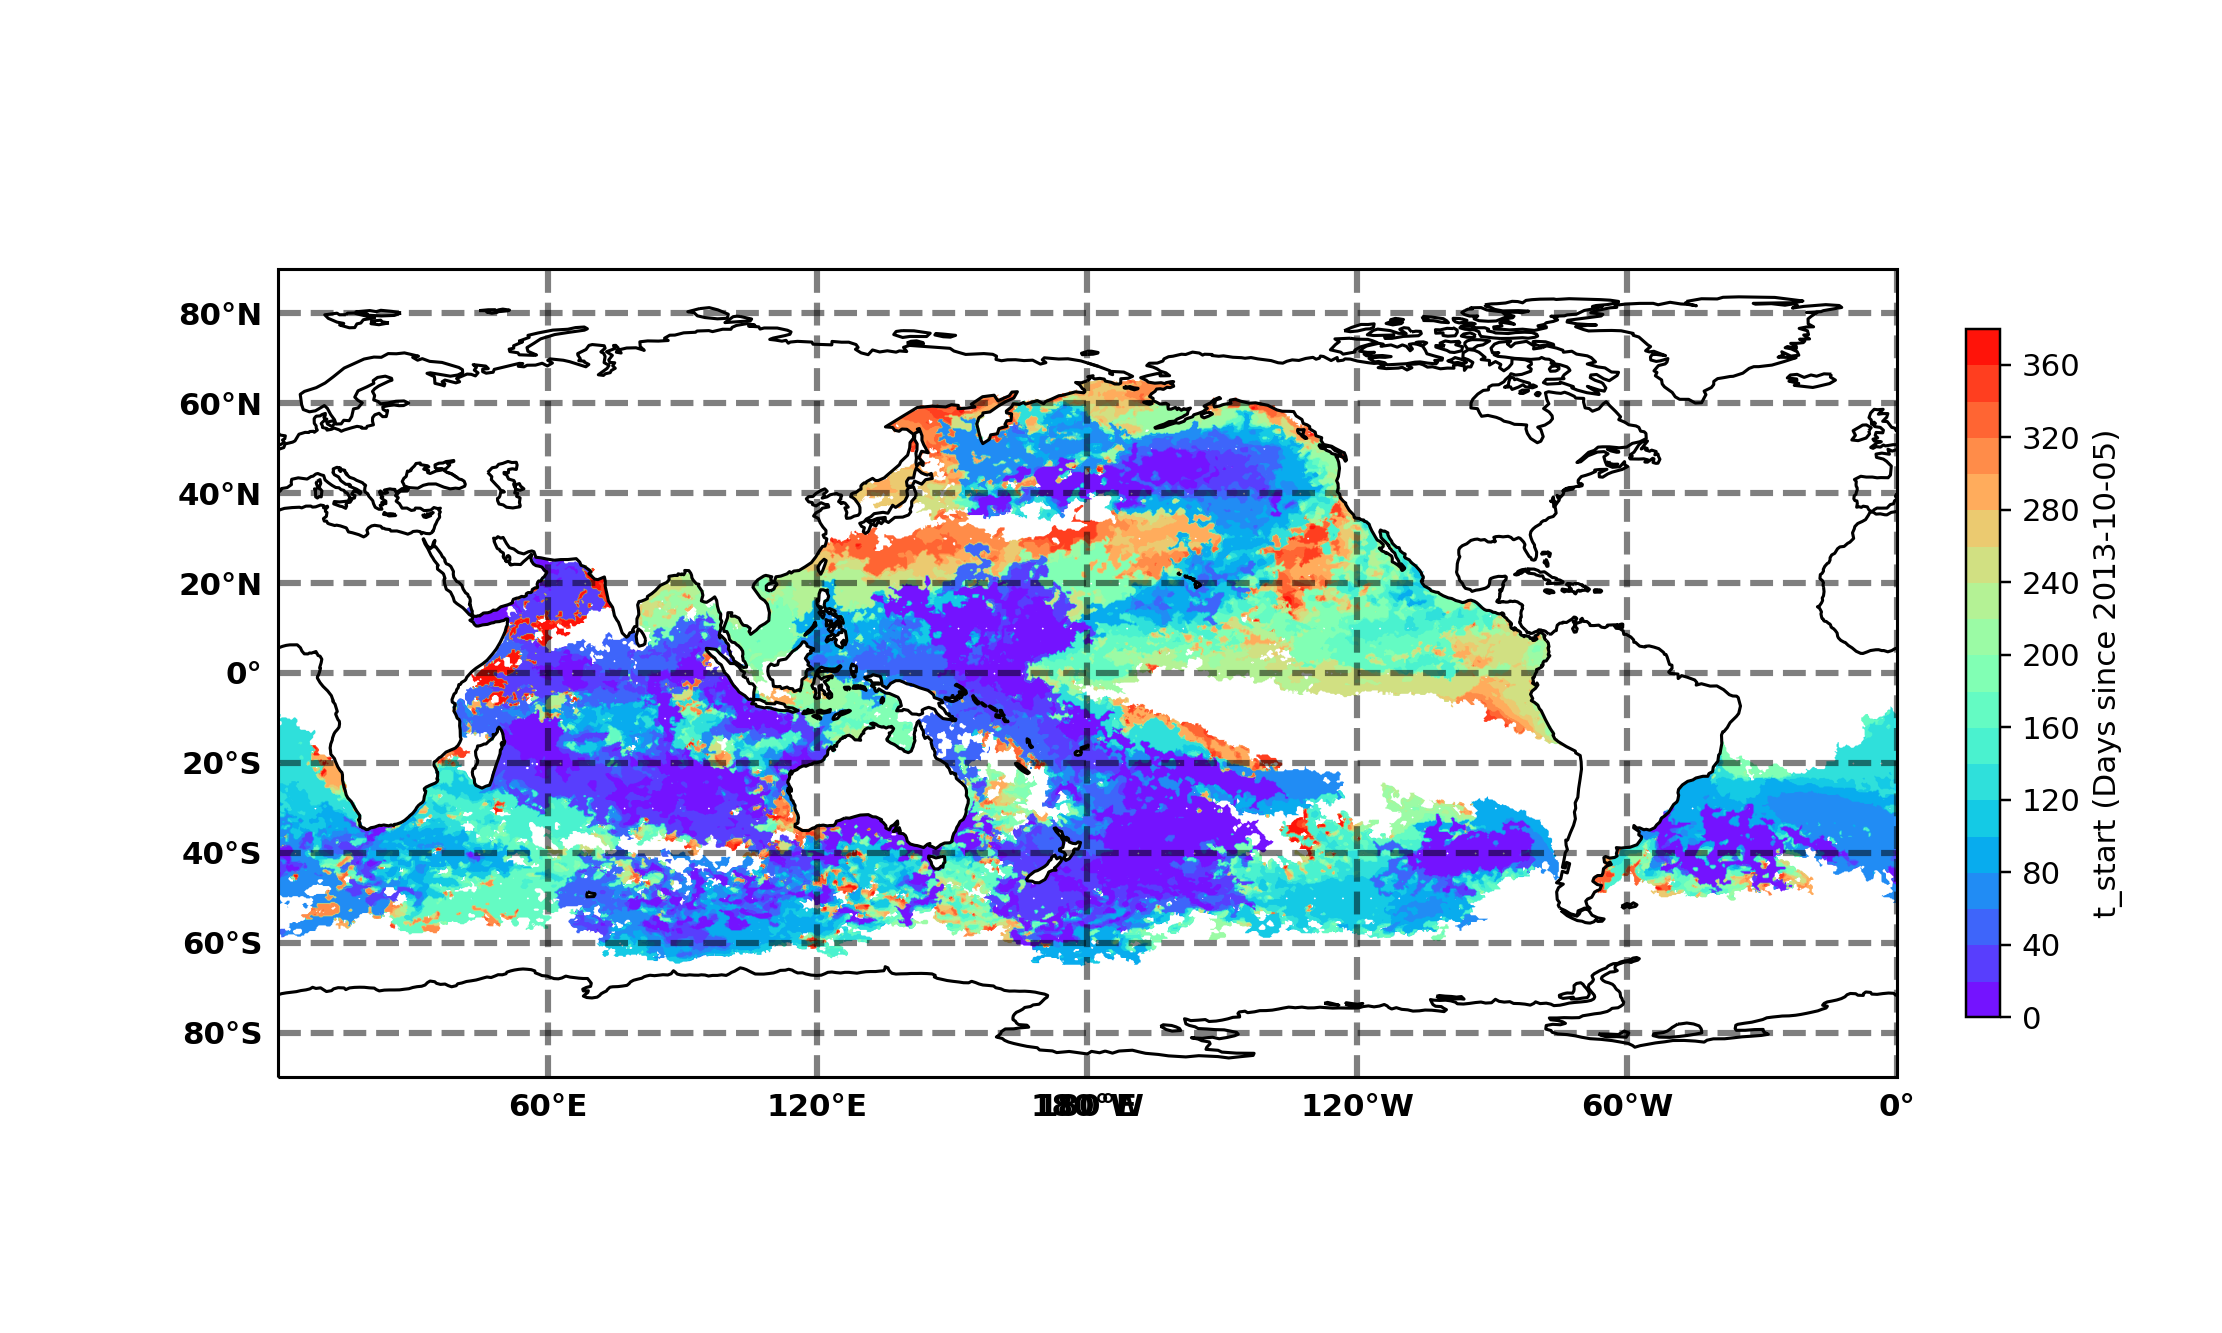

In [181]:
# First day
fig = plt.figure(figsize=(10, 6))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('rainbow')

cplt = iris.plot.contourf(tstart_blob_cube, 20, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('t_start (Days since 2013-10-05)')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()


# Gridlines
# https://stackoverflow.com/questions/49956355/adding-gridlines-using-cartopy
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5,
                  linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}
#gl.xlocator = mticker.FixedLocator([-180., -170., -160, -150., -140, -120, -60, -20.])
#gl.ylocator = mticker.FixedLocator([30., 40., 50., 60.])


plt.show()

<IPython.core.display.Javascript object>


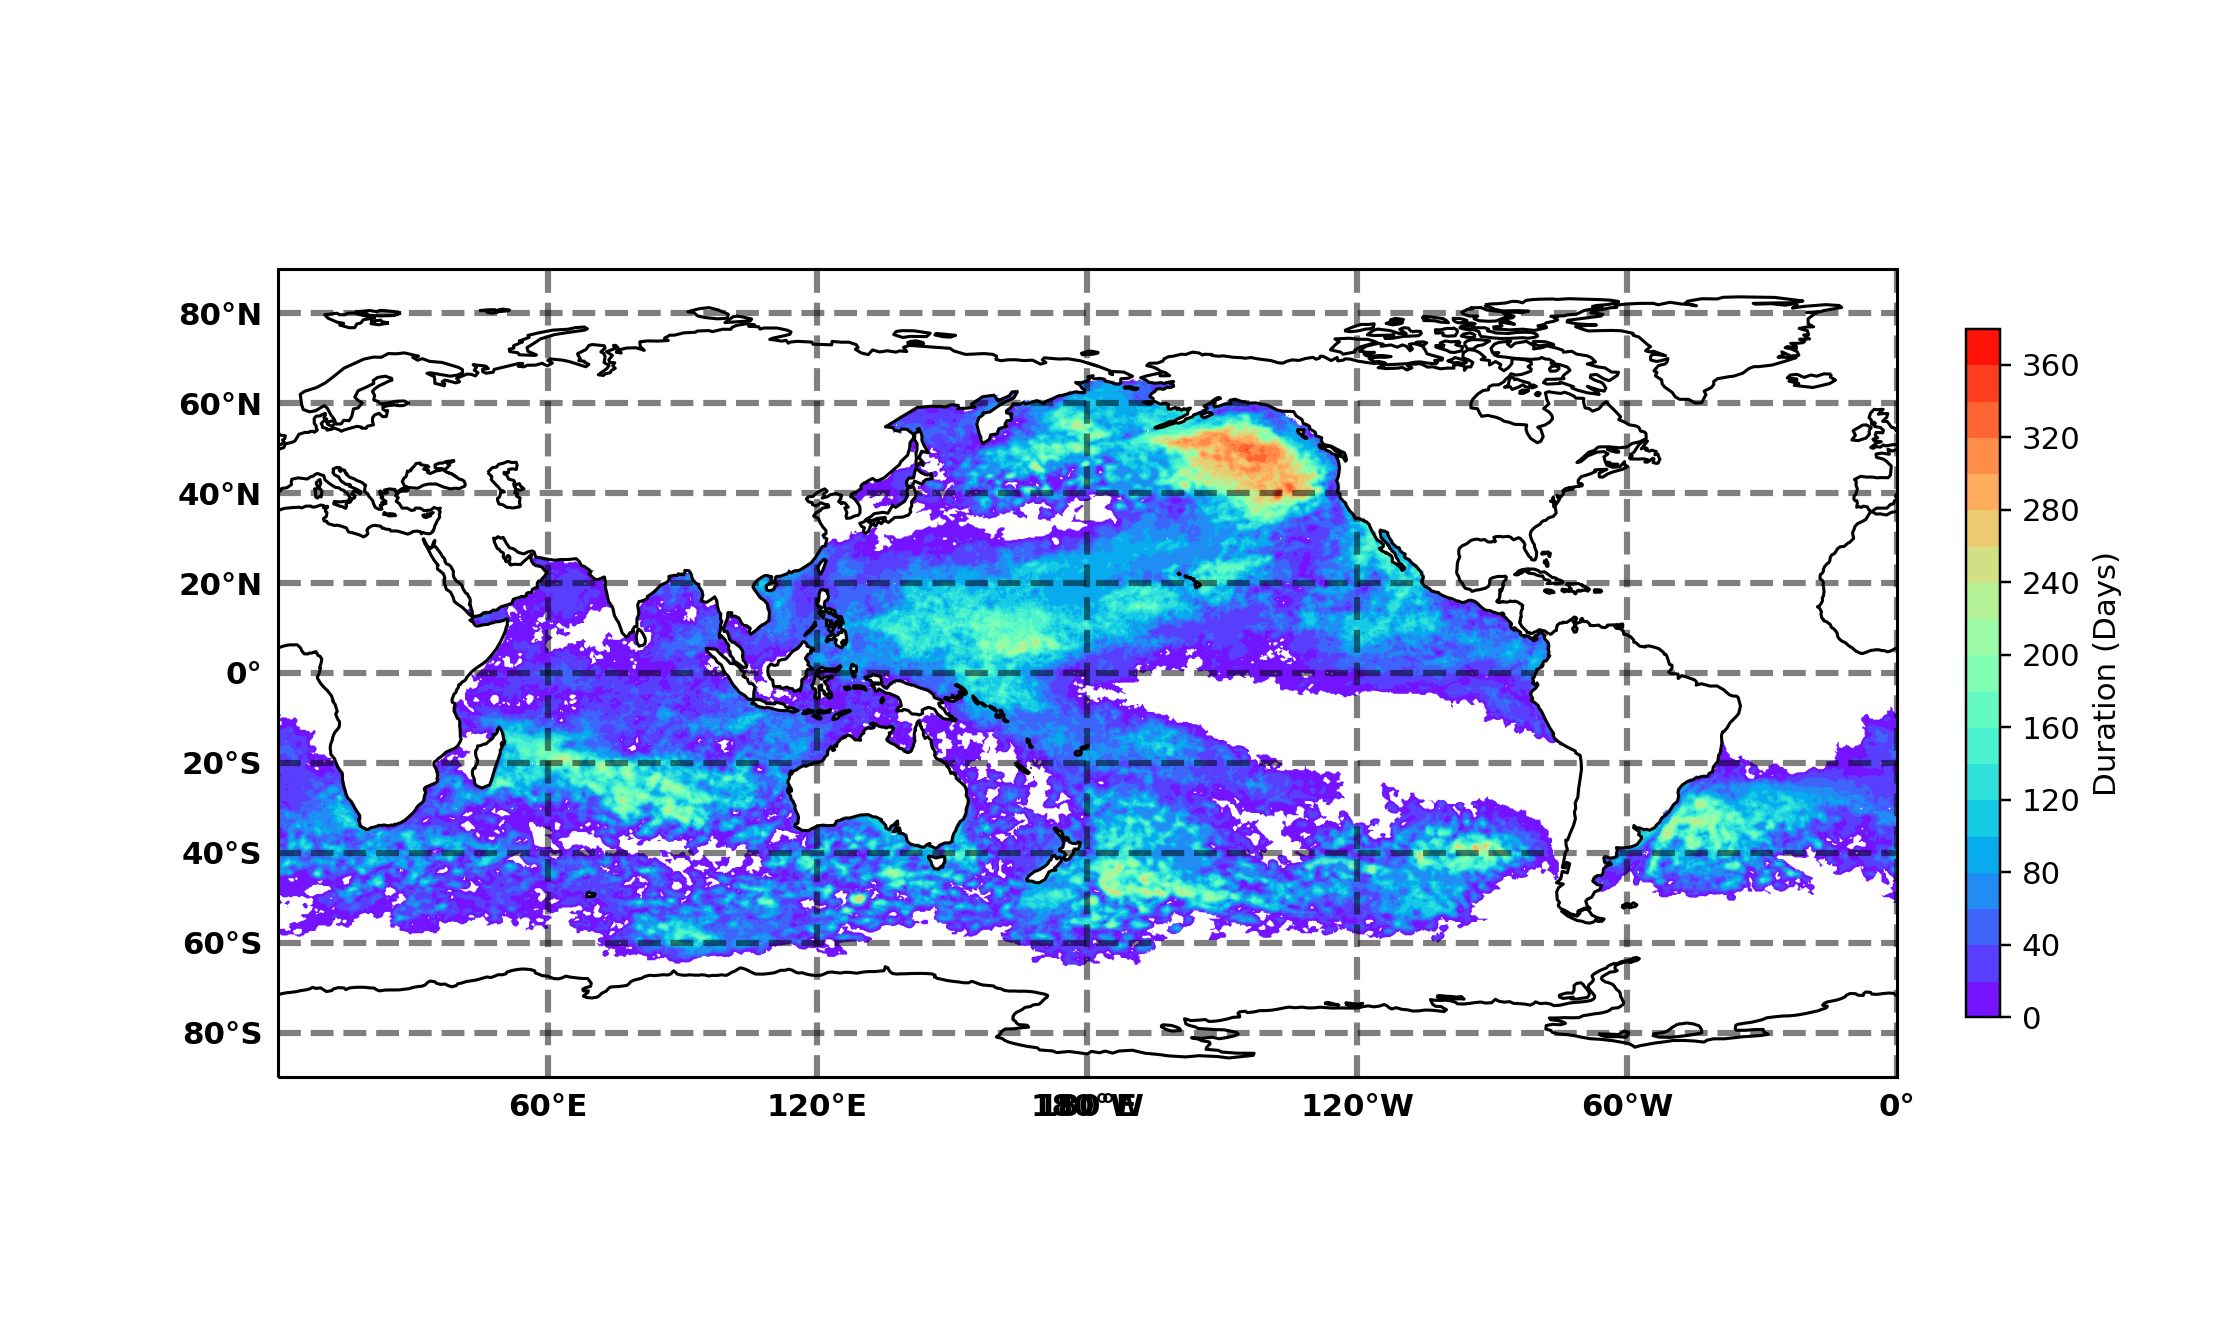

In [193]:
# Duration
fig = plt.figure(figsize=(10, 6))
plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)

# Pacific events
# Draw the contour with 25 levels.
cm = plt.get_cmap('rainbow')

cplt = iris.plot.contourf(dur_blob_cube, 20, cmap=cm)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('Duration (Days)')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()


# Gridlines
# https://stackoverflow.com/questions/49956355/adding-gridlines-using-cartopy
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5,
                  linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right=False
gl.xlines = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'weight': 'bold'}
#gl.xlocator = mticker.FixedLocator([-180., -170., -160, -150., -140, -120, -60, -20.])
#gl.ylocator = mticker.FixedLocator([30., 40., 50., 60.])


plt.show()

## Check out SSTa for these days

In [123]:
day1 = datetime.date.fromordinal(datetime.date(2013, 10, 5).toordinal() + 150)
day1.toordinal(), day1

(735296, datetime.date(2014, 3, 4))

In [114]:
cubes = iris.cube.CubeList()
dayo = []

for kk in range(50):
    #
    day_ordinal = day1.toordinal() + kk
    idate = datetime.date.fromordinal(day_ordinal)
    # Load SSTa
    SSTa = sst_io.load_noaa((idate.day, idate.month, idate.year), subtract_seasonal=True)
    # Cut on Region
    #latlon_constraint = iris.Constraint(
    #    latitude=lambda cell: 15. <= cell < 70.,
    #    longitude=lambda cell: 180. < cell < 270.)
    #pacific_slice = SSTa.extract(latlon_constraint)
    pacific_slice = SSTa
    if kk == 0:
        sum_slice = pacific_slice
    else:
        sum_slice += pacific_slice
    #cubes.append(pacific_slice)
    #
    dayo.append(day_ordinal)

In [115]:
avg_slice = sum_slice / len(dayo)

<IPython.core.display.Javascript object>


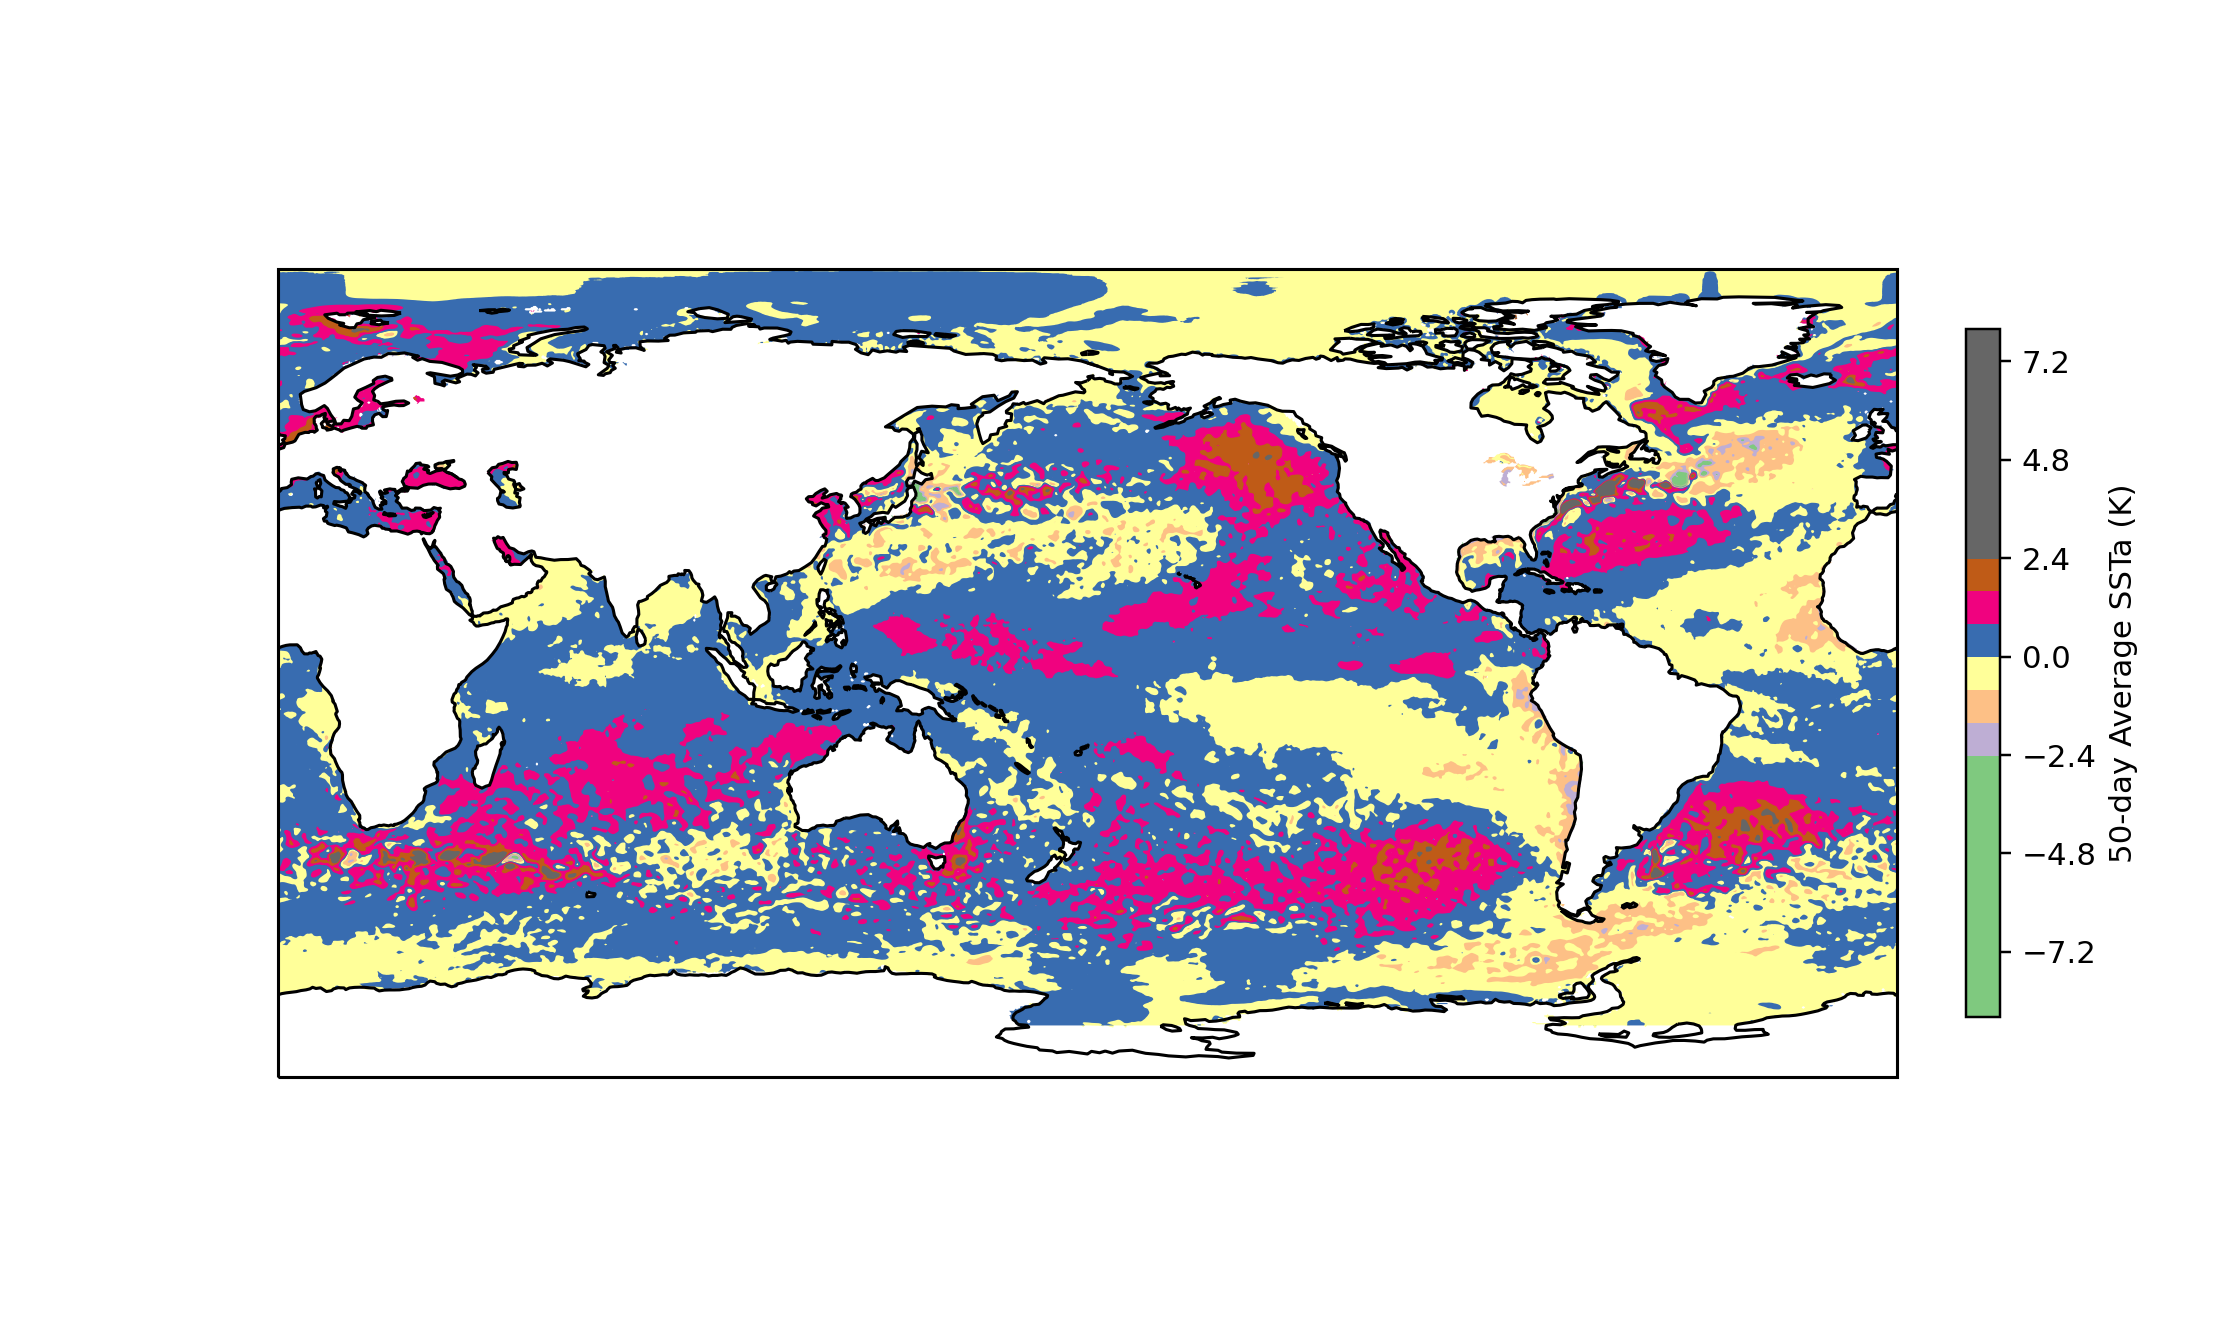

In [126]:
fig = plt.figure(figsize=(10, 6))

plt.clf()

proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = plt.gca(projection=proj)


# Draw the contour with 25 levels.
cm = plt.get_cmap('Accent')
cplt = iris.plot.contourf(avg_slice, 20, cmap=cm, vmin=-3., vmax=3.)  # , vmin=0, vmax=20)#, 5)
cb = plt.colorbar(cplt, fraction=0.020, pad=0.04)
cb.set_label('50-day Average SSTa (K)')

# Add coastlines to the map created by contourf.
plt.gca().coastlines()

plt.show()

----

# Varying

In [6]:
mhw_sys_vary = mhw_sys_io.load_systems(vary=True)

Loading systems from /data/Projects/Oceanography/MHW/db/MHW_systems_vary.hdf


In [9]:
imax = np.argmax(mhw_sys_vary.NSpax)
imax

5245

In [10]:
mhw_sys_vary.iloc[imax]

NSpax        175183369
category             4
mask_Id          26868
max_area        101445
xcen           98.0679
xboxmin             65
xboxmax            718
ycen           196.136
yboxmin              0
yboxmax           1439
zcen           1569.09
zboxmin           9519
zboxmax          13877
date        1986-04-19
lat            -65.358
lon             49.159
Name: 5246, dtype: object

In [4]:
datetime.date.fromordinal(datetime.date(1982,1,1).toordinal() + 9519)

datetime.date(2008, 1, 24)